In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, plot_some
from csbdeep.data import RawData, create_patches

In [2]:
y = imread('C:/Users/Spencer Du/Documents/MSc Computing with placement Cardiff Uni/Placement/Machine learning for imaging project/Data/for_spencer/GT/Cam_00000.tiff')
x = imread('C:/Users/Spencer Du/Documents/MSc Computing with placement Cardiff Uni/Placement/Machine learning for imaging project/Data/for_spencer/low/Cam_00000.tiff')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Spencer Du\\Documents\\MSc Computing with placement Cardiff Uni\\Placement\\Machine learning for imaging project\\Data\\for_spencer\\GT\\Cam_Right_00000.tiff'

image size = (256, 2048, 1024)


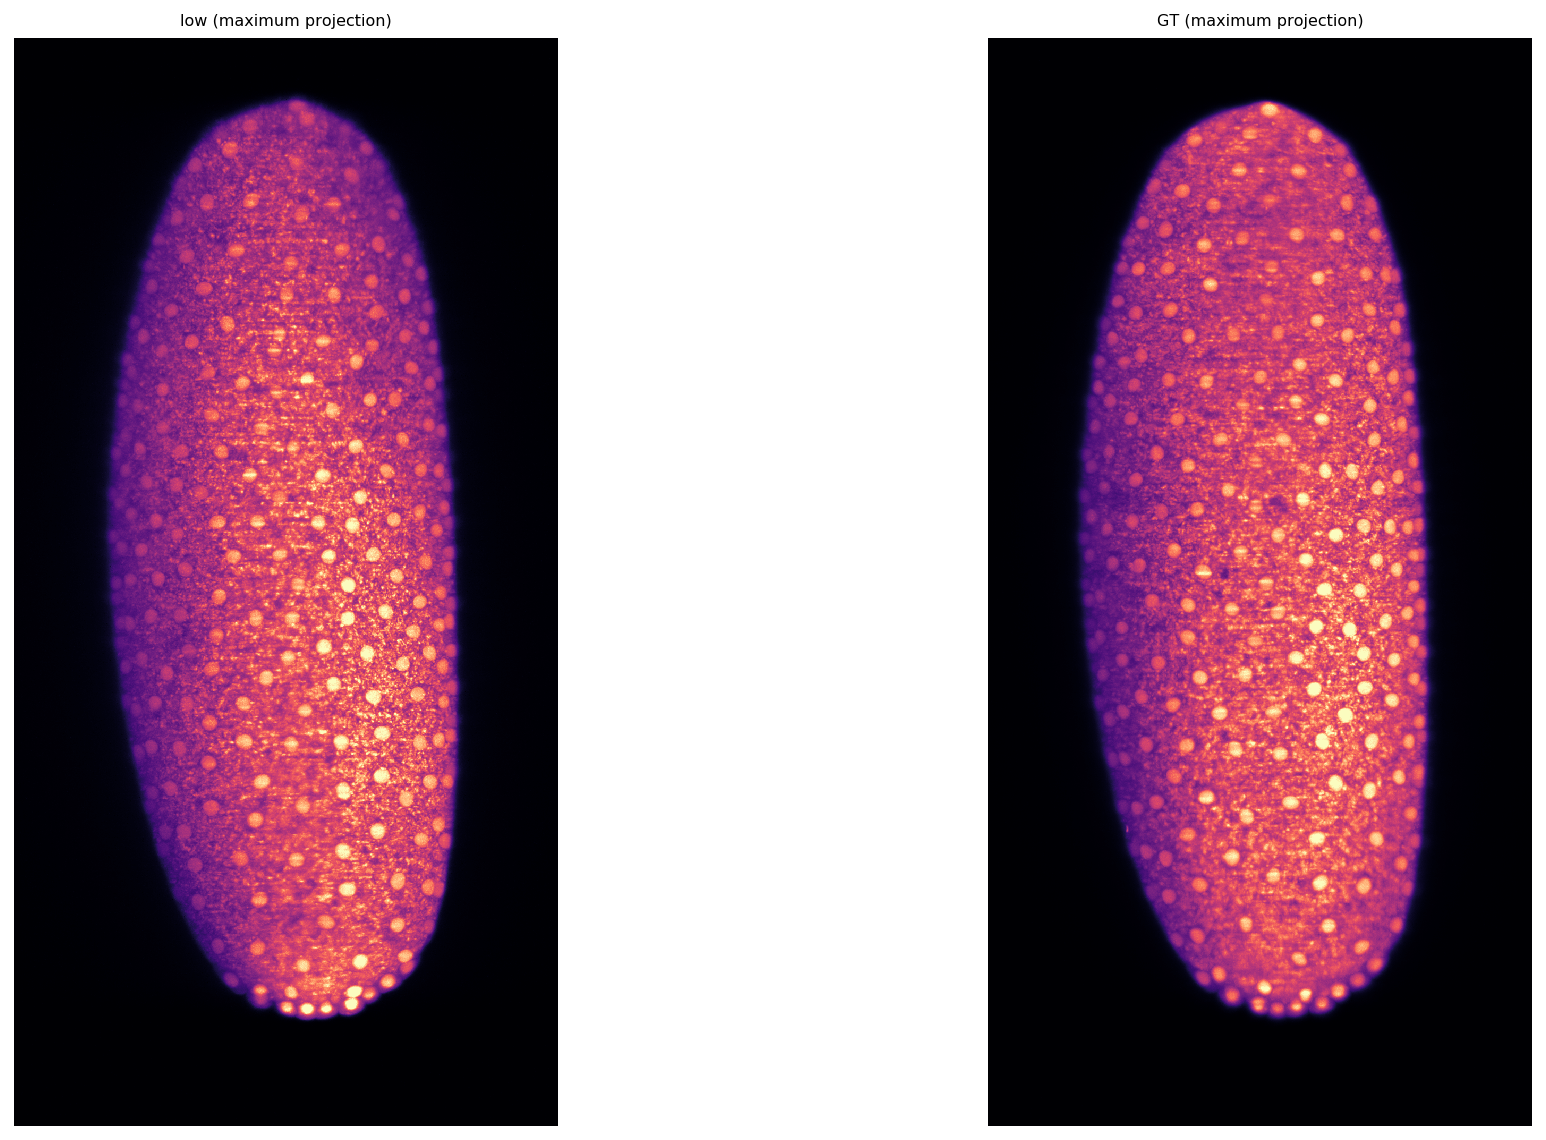

In [6]:
raw_data = RawData.from_folder (
    basepath    = 'C:/Users/Spencer Du/Documents/MSc Computing with placement Cardiff Uni/Placement/Machine learning for imaging project/Data/for_spencer/',
    source_dirs = ['low'],
    target_dir  = 'GT',
    axes        = 'ZYX',
)

print('image size =', x.shape)

plt.figure(figsize=(16,10))
plot_some(np.stack([x,y]),
          title_list=[['low (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);

In [5]:
X, Y, XY_axes = create_patches (
    raw_data            = raw_data,
    patch_size          = (16,64,64),
    n_patches_per_image = 1024,
    save_file           = 'data/my_training_data.npz',
)

    1 raw images x    1 transformations   =     1 images
    1 images     x 1024 patches per image =  1024 patches in total
Input data:
C:/Users/Spencer Du/Documents/MSc Computing with placement Cardiff Uni/Placement/Machine learning for imaging project/Data/for_spencer/: target='GT', sources=['low'], axes='ZYX', pattern='*.tif*'
Transformations:
1 x Identity
Patch size:
16 x 64 x 64


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [01:42<00:00, 102.41s/it]


Saving data to data\my_training_data.npz.


In [7]:
assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

shape of X,Y = (1024, 1, 16, 64, 64)
axes  of X,Y = SCZYX


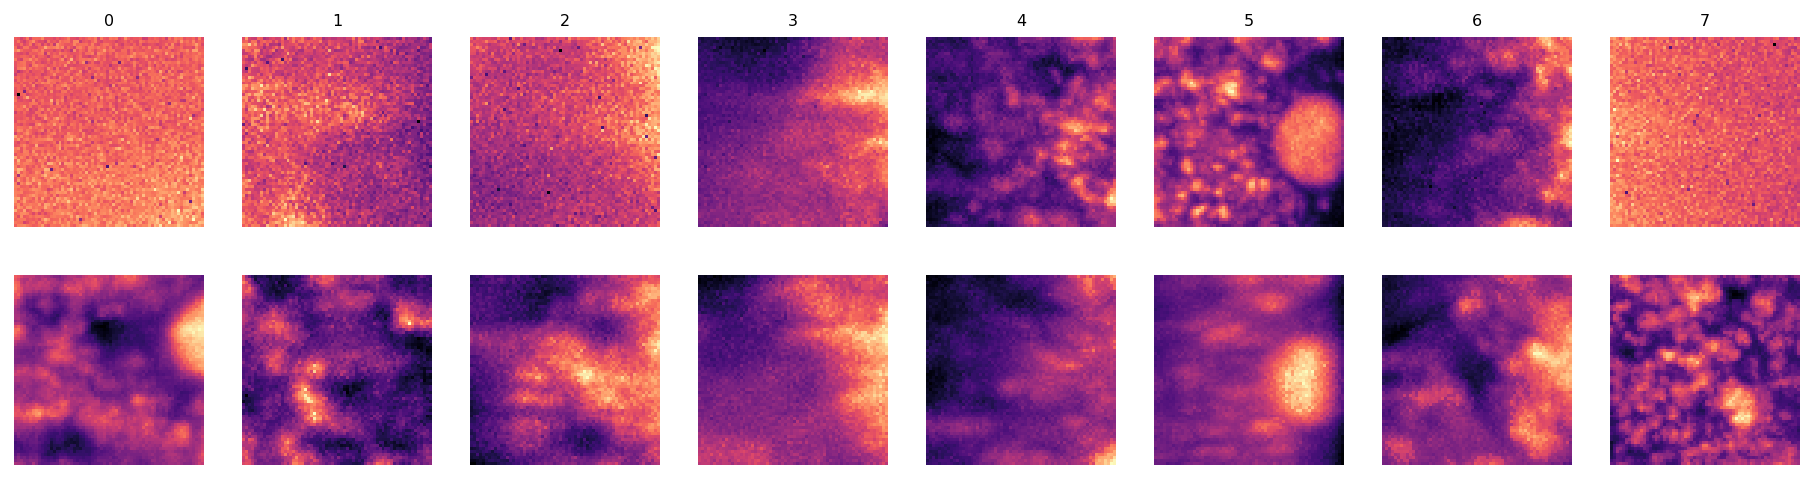

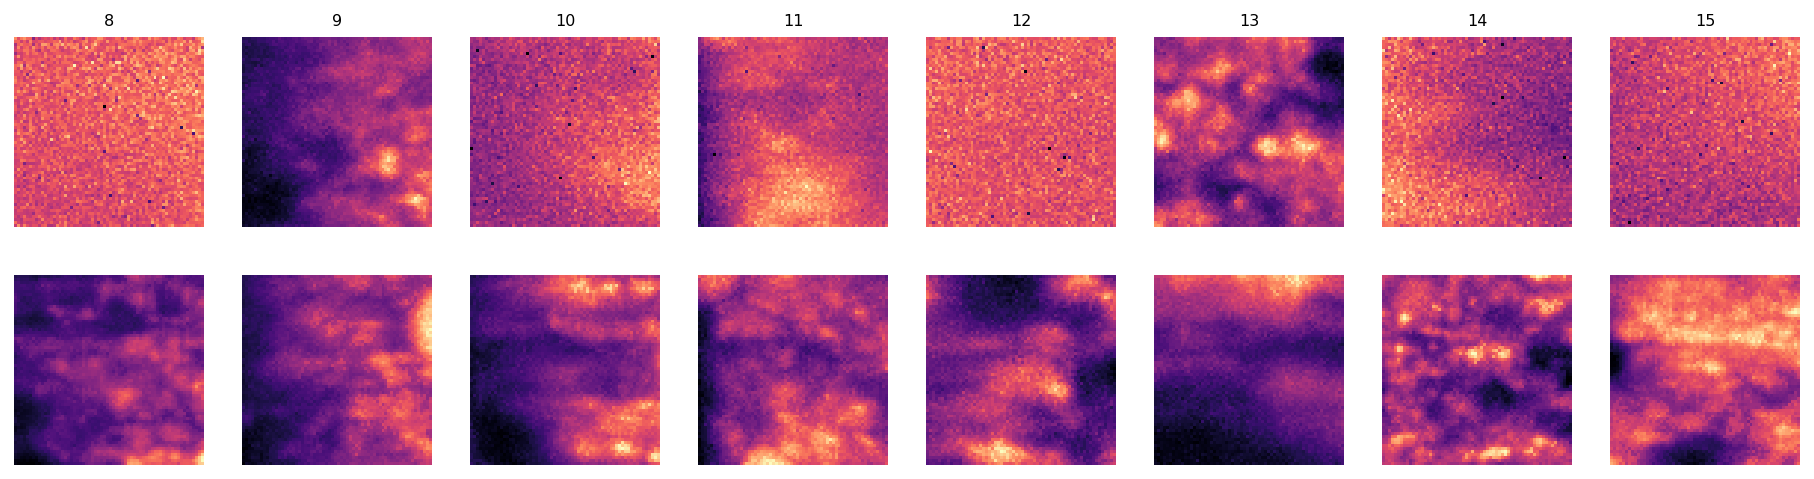

In [8]:
for i in range(2):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
None;